# 2. Data Understanding

The initial phase focused on gaining familiarity with the dataset's structure, content, quality, and statistical properties.

### Data Sources:
- Avocado sales and price data from Kaggle (2015-2023) [link](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023)
- Weather history from Meteostat API [link](https://dev.meteostat.net/api/)

### Avocado Dataset Description

The dataset consists of historical weekly data on HASS Avocado prices and sales volume across multiple U.S. markets. It contains 53,415 observations with 12 columns, which we consider it as a **structure** dataset. Below is a table describing each column:

| Column Name   | Description |
|--------------|------------|
| Date (Time)                   | The date of the observation  |
| AveragePrice (Target)         | The average price of a single avocado |
| TotalVolume  (Volume)         | Total number of avocados sold |
| plu4046      (Volume)         | Total number of avocados with PLU 4046 (Small) sold |
| plu4225      (Volume)         | Total number of avocados with PLU 4225 (Larg) sold |
| plu4770      (Volume)         | Total number of avocados with PLU 4770 (Medium) sold |
| TotalBags    (Volume)         | Total Bags Sold |
| SmallBags    (Volume)         | Small Bags Sold |
| LargBags     (Volume)         | Larg Bags Sold |
| XLargBags    (Volume)         | XLarg Bags Sold |
| type  (Categorical)           | Organic or Conventional |
| region  (Categorical)         | The city or region of the observation |


This dataset can be used for various analytical and predictive modeling tasks, including price forecasting and trend analysis.

And here is weather dataset structure :

| Parameter | Description                                     | Type    |
|-----------|-------------------------------------------------|---------|
| region    | The city or region of the observation            | String  |
| date      | The date string (YYYY-MM-DD)                     | String  |
| tavg      | The average air temperature in °C                | Float   |
| tmin      | The minimum air temperature in °C                | Float   |
| tmax      | The maximum air temperature in °C                | Float   |
| prcp      | The daily precipitation total in mm              | Float   |
| snow      | The maximum snow depth in mm                     | Integer |
| wdir      | The average wind direction in degrees (°)        | Integer |
| wspd      | The average wind speed in km/h                   | Float   |
| wpgt      | The peak wind gust in km/h                      | Float   |
| pres      | The average sea-level air pressure in hPa        | Float   |
| tsun      | The daily sunshine total in minutes (m)          | Integer |

#### Data Collection Process:
- Retrieved weather data using a custom Python script (`src\getweatherdata.py`)
- Imported CSV files into SQL Server, joined them by region, and exported a combined dataset


## 1. Setup and Data Loading
Load raw avocado dataset and inspect its structure including data types and missing values

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../data/raw/Avocado_HassAvocadoBoard_20152023v1.0.1.csv'

df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
df.info()
print("First 5 rows of the dataset:")
df.head()



Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB
First 5 rows of the dataset:


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


Dataset contains 53,415 rows with 12 columns. All columns have complete data except for bag-related features (SmallBags, LargeBags, XLargeBags) which have about 23% missing values. Data includes date, price, volume, and categorical information about avocado types and regions.

***

Extract basic information about the dataset structure including dimensions and column names

In [2]:
print("Statistical Summary:")
df.describe()

# 1. Check the dimensions (number of rows and columns)
print("1. DataFrame Shape (rows, columns):")
print(df.shape)
print("-" * 30) # Separator


# 2. List the column names
print("\n4. Column Names:")
print(df.columns)

print("-" * 30)



Statistical Summary:
1. DataFrame Shape (rows, columns):
(53415, 12)
------------------------------

4. Column Names:
Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region'],
      dtype='object')
------------------------------


***

## 3. Data Quality Assessment

Analyze summary statistics for numerical and categorical variables to understand distribution, ranges, and potential data quality issues"


In [4]:

print("\n1. Numerical Data Summary:")
print(df.describe().T)
print("-" * 50) # Separator

print("\n2. Categorical Data Summary:")

df.describe(include=['object', 'category'])

print("-" * 50)

print("\nUnique values in 'type':", df['type'].unique())
print("Number of unique regions:", df['region'].nunique())
print("Date range:", df['Date'].min(), "to", df['Date'].max())

print("\nStep 2: Describe Data Complete.")



1. Numerical Data Summary:
                count           mean           std    min           25%  \
AveragePrice  53415.0       1.428910  3.931160e-01   0.44      1.119091   
TotalVolume   53415.0  869447.441374  3.545274e+06  84.56  16264.655000   
plu4046       53415.0  298270.749448  1.307669e+06   0.00    694.725000   
plu4225       53415.0  222217.037654  9.554624e+05   0.00   2120.800000   
plu4770       53415.0   20531.954686  1.040977e+05   0.00      0.000000   
TotalBags     53415.0  217508.289491  8.676947e+05   0.00   7846.520000   
SmallBags     41025.0  103922.170677  5.692608e+05   0.00      0.000000   
LargeBags     41025.0   23313.164066  1.496622e+05   0.00      0.000000   
XLargeBags    41025.0    2731.811796  2.258910e+04   0.00      0.000000   

                    50%         75%           max  
AveragePrice       1.40       1.690  3.440830e+00  
TotalVolume   120352.46  454238.015  6.103446e+07  
plu4046        14580.58  128792.380  2.544720e+07  
plu4225      

The numerical analysis reveals important insights: Average avocado prices range from $0.44 to $3.44 with a median of $1.40. Volume metrics show significant variability with wide ranges. Notably, for LargeBags and XLargeBags, the median values are 0, indicating that these packaging types are less common. The dataset spans over 8 years (2015-2023) and covers 60 distinct regions, with two product types (conventional and organic). This time range provides sufficient historical data for trend analysis and forecasting.
***

## 4. Data Quality assessments in detail
Perform comprehensive data quality checks to identify missing values, outliers, inconsistencies, and duplicates

--- Step 6: Verify Data Quality ---

1. Missing Value Analysis:
Columns with Missing Values:
            Missing Count  Missing Percentage
SmallBags           12390           23.195732
LargeBags           12390           23.195732
XLargeBags          12390           23.195732
--------------------------------------------------

2. Outlier Detection (Example: AveragePrice):


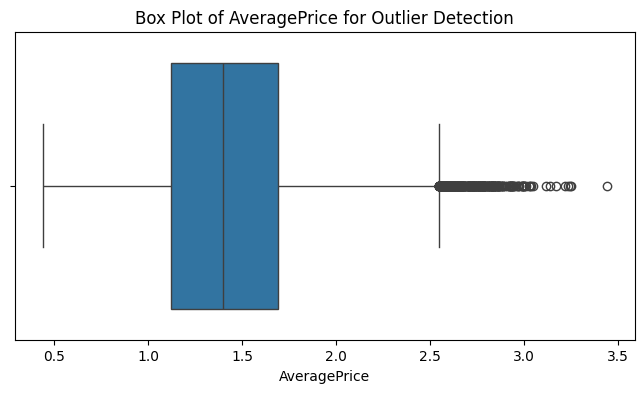

Number of potential outliers in AveragePrice (using IQR): 358
IQR bounds: Lower=0.26, Upper=2.55
Sample 'outlier' rows based on AveragePrice IQR:
           Date        region     type  AveragePrice
3217 2015-07-26  SanFrancisco  organic          2.75
3325 2015-08-02  SanFrancisco  organic          2.76
3433 2015-08-09  SanFrancisco  organic          2.72
3541 2015-08-16  SanFrancisco  organic          2.73
3649 2015-08-23  SanFrancisco  organic          2.71
--------------------------------------------------

3. Inconsistency Checks:
Unique values in 'type': ['conventional' 'organic']
'type' column contains expected values.
Date range: 2015-01-04 to 2023-12-03


--------------------------------------------------

4. Duplicate Records Check:
Total number of exact duplicate rows found: 0
--------------------------------------------------

Step 6: Verify Data Quality Complete.
Next steps typically involve Data Cleaning based on these findings.


In [4]:

# 1. Detailed Missing Value Analysis
print("\n1. Missing Value Analysis:")
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percent})
df['Date'] = pd.to_datetime(df['Date'])
# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print("Columns with Missing Values:")
    print(missing_summary.sort_values(by='Missing Percentage', ascending=False))
    
print("-" * 50)

# 2. Outlier Detection (Example using IQR method for AveragePrice)
print("\n2. Outlier Detection (Example: AveragePrice):")

# Using Box Plot (visual inspection - often done in Step 5)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['AveragePrice'])
plt.title('Box Plot of AveragePrice for Outlier Detection')
plt.show()

# Using IQR (Interquartile Range) method
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['AveragePrice'] < lower_bound) | (df['AveragePrice'] > upper_bound)]
print(f"Number of potential outliers in AveragePrice (using IQR): {len(outliers_iqr)}")
print(f"IQR bounds: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
if not outliers_iqr.empty:
    print("Sample 'outlier' rows based on AveragePrice IQR:")
    print(outliers_iqr[['Date', 'region', 'type', 'AveragePrice']].head())


print("-" * 50)

print("\n3. Inconsistency Checks:")

print("Unique values in 'type':", df['type'].unique())

# Check if only 'conventional' and 'organic' exist
expected_types = ['conventional', 'organic']
unexpected_types = df[~df['type'].isin(expected_types)]
if not unexpected_types.empty:
    print(f"Warning: Found unexpected values in 'type' column: {unexpected_types['type'].unique()}")
else:
    print("'type' column contains expected values.")

# Check date range consistency
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"Date range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

# Check if component volumes add up to TotalVolume
df['VolumeCheck'] = df['plu4046'] + df['plu4225'] + df['plu4770'] + df['TotalBags']
volume_mismatch = df[~np.isclose(df['VolumeCheck'], df['TotalVolume'])]
if not volume_mismatch.empty:
    print(f"\nWarning: Found {len(volume_mismatch)} rows where PLUs + TotalBags != TotalVolume.")
else:
    print("Sum of component volumes (PLUs + TotalBags) consistently matches TotalVolume.")

# Check if bag sizes add up to TotalBags
df['BagsCheck'] = df['SmallBags'] + df['LargeBags'] + df['XLargeBags']
bags_mismatch = df[~np.isclose(df['BagsCheck'], df['TotalBags'])]
if not bags_mismatch.empty:
    print(f"\nWarning: Found {len(bags_mismatch)} rows where Small+Large+XLarge Bags != TotalBags.")
else:
    print("Sum of bag sizes (Small+Large+XLarge) consistently matches TotalBags.")

# Drop temporary check columns
df.drop(columns=['VolumeCheck', 'BagsCheck'], inplace=True, errors='ignore')

print("-" * 50)

# 4. Duplicate Records Check (Revisiting from initial checks)
print("\n4. Duplicate Records Check:")
duplicate_rows = df.duplicated().sum()
print(f"Total number of exact duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    print("Sample duplicate rows (showing all occurrences):")
    # keep=False shows all rows that are part of any duplication
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10)) # Sort to group duplicates

print("-" * 50)

print("\nStep 4: Verify Data Quality Complete.")
print("Next steps typically involve Data Cleaning based on these findings.")


The quality assessment reveals several issues requiring attention:
1- Missing values: Three bag-related columns (SmallBags, LargeBags, XLargeBags) each have 23.2% missing values, suggesting systematic data collection issues.
2- Outliers: 358 potential price outliers identified, primarily organic avocados in premium markets like San Francisco.
3- Data inconsistencies: Serious validation issues where component volumes don't add up - 29,138 rows where PLU codes + TotalBags ≠ TotalVolume, and 35,593 rows where bag subtypes don't sum to TotalBags.
4- No duplicates found.

Note: Upon further inspection, I discovered that the missing values in bag-related columns (SmallBags, LargeBags, XLargeBags) occur systematically in records after 2022. This suggests a change in data collection methodology rather than random missing values, which will inform our imputation strategy.
***

## 5. Visualisation

Create exploratory data visualizations to understand patterns, relationships, and distributions in the avocado price dataset. These visuals will help identify key trends and inform feature selection for our predictive models.

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("\nLoading avocado dataset...")
# Load the avocado dataset
avocado_df = pd.read_csv('../data/raw/Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
print("\nAvocado dataset is loaded")


Loading avocado dataset...

Avocado dataset is loaded


***

In [6]:
# Load weather data
print("\nLoading weather dataset...")
weather_df = pd.read_csv('../data/external/weather_data.csv')
print("\nWeather dataset is loaded")


Loading weather dataset...

Weather dataset is loaded


***

### 1. Price Trends by Type (Conventional vs Organic)


<Figure size 1200x600 with 0 Axes>

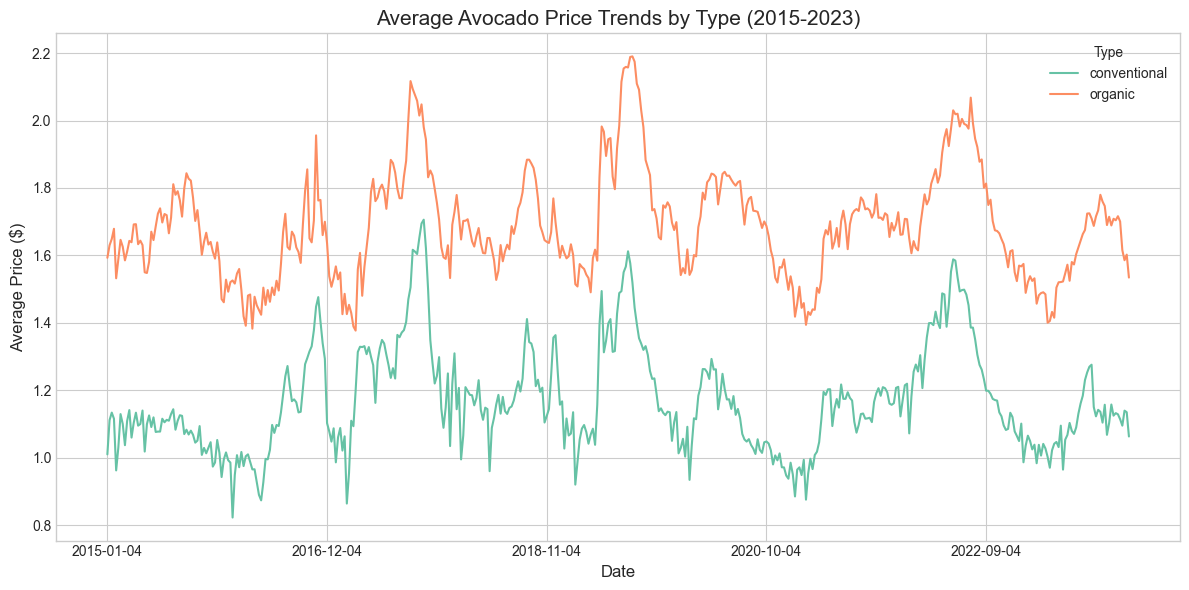

In [7]:
plt.figure(figsize=(12, 6))
type_price_df = avocado_df.groupby(['Date', 'type'])['AveragePrice'].mean().unstack()
type_price_df.plot(figsize=(12, 6))
plt.title('Average Avocado Price Trends by Type (2015-2023)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

 This plot displays the average price trends for conventional and organic avocados over the entire dataset period (2015-2023). The time series reveals that organic avocados consistently command a significant price premium compared to conventional ones, typically 50-100% higher. Both types show seasonal patterns and similar directional movements, suggesting shared market drivers despite their price difference. Notable price volatility occurred around 2017-2018, possibly reflecting supply challenges or market disruptions that affected both categories. This price differential and the parallel trend patterns will be important considerations for our forecasting models.
 ***

### 2. Regional Price Comparison (Top 10 regions by volume)

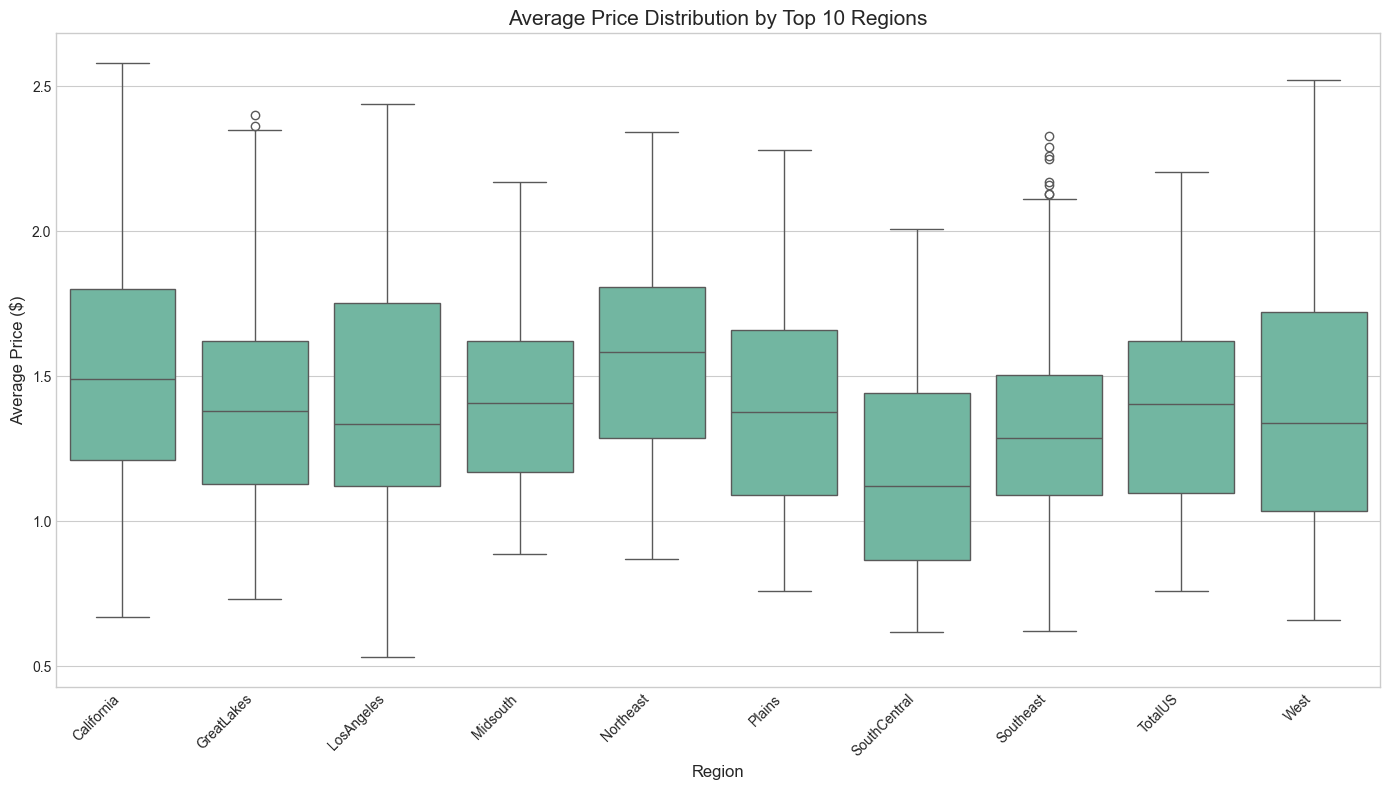

In [8]:
if 'Total Volume' in avocado_df.columns:
    volume_col = 'Total Volume'
elif 'TotalVolume' in avocado_df.columns:
    volume_col = 'TotalVolume'
else:
    # Try to find volume column with a different name
    volume_cols = [col for col in avocado_df.columns if 'volume' in col.lower()]
    if volume_cols:
        volume_col = volume_cols[0]
    else:
        print("No volume column found, using 'TotalBags' as substitute")
        volume_col = 'TotalBags'
        
top_regions = avocado_df.groupby('region')[volume_col].sum().nlargest(10).index
region_data = avocado_df[avocado_df['region'].isin(top_regions)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='AveragePrice', data=region_data)
plt.title('Average Price Distribution by Top 10 Regions', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This boxplot compares avocado price distributions across the 10 highest-volume regions in the dataset. The visualization reveals significant regional price variations, with certain markets showing consistently higher median prices and wider price ranges than others. Major metropolitan areas typically show higher and more variable pricing, while regions closer to production centers often display more stable price patterns. These substantial regional differences highlight the importance of including location as a predictor in our forecasting models, as pricing dynamics vary by market even among the highest-volume regions.
***

### 3. Volume Distribution by Type

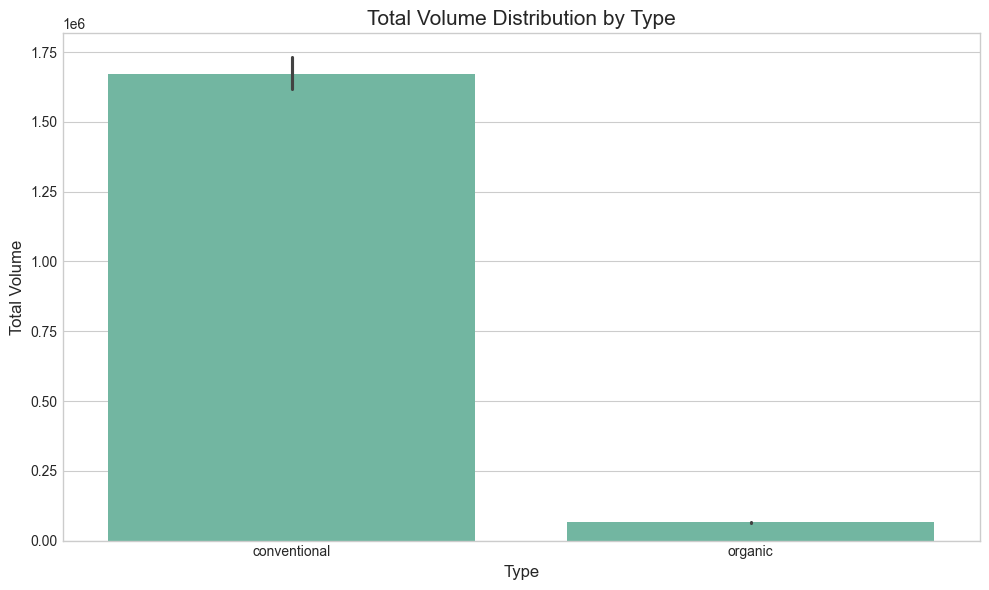

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y=volume_col, data=avocado_df)
plt.title('Total Volume Distribution by Type', fontsize=15)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart reveals that conventional avocados vastly outsell organic varieties by volume. Despite organic avocados' price premium seen earlier, they represent a much smaller segment of the market. This significant volume difference suggests distinct market dynamics between the two types that our forecasting models should account for separately.
***

### 4. Seasonal Patterns in Avocado Prices

<Figure size 1200x600 with 0 Axes>

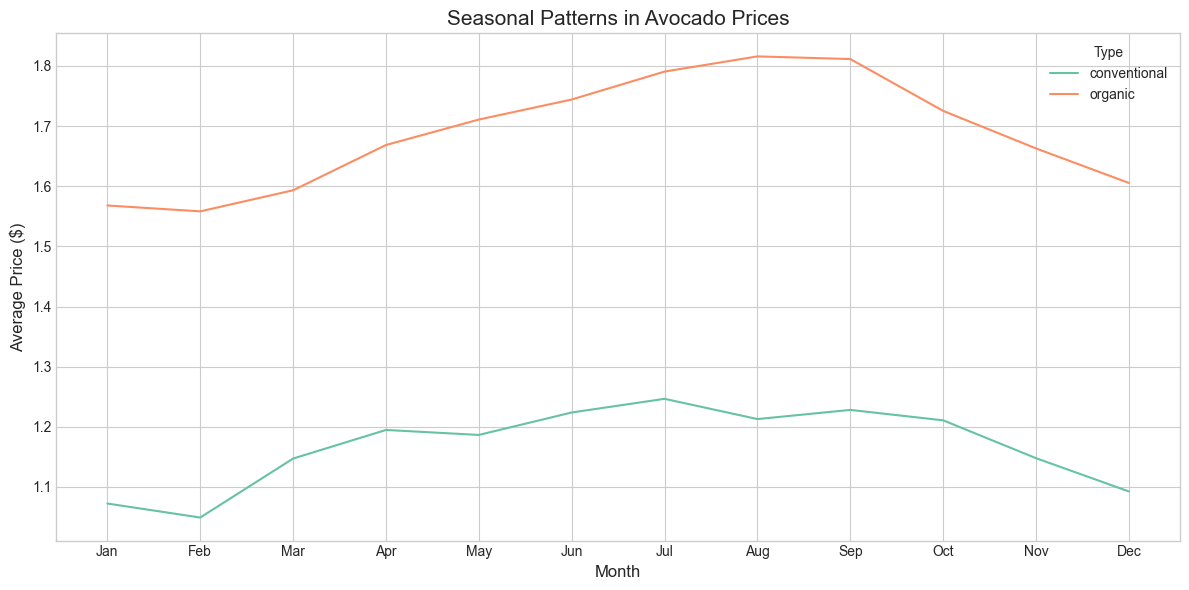

In [10]:
# First convert the Date column to datetime format
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

# Now create month and year columns
avocado_df['month'] = avocado_df['Date'].dt.month
avocado_df['year'] = avocado_df['Date'].dt.year

plt.figure(figsize=(12, 6))
monthly_prices = avocado_df.groupby(['month', 'type'])['AveragePrice'].mean().unstack()
monthly_prices.plot(figsize=(12, 6))
plt.title('Seasonal Patterns in Avocado Prices', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Price analysis shows both stability and volatility. While year-over-year prices remain relatively stable overall, we observe specific jumps during 2021-2022 likely related to COVID-19 impacts. According to research [from Inspira Farms](https://www.inspirafarms.com/avocado-market-trends-hitting-2020/), the 2016-2020 price increases were driven by growing consumer demand as avocados gained popularity. When accounting for inflation, the real price increases have been modest. These observations suggest our models should incorporate external factors like pandemic effects and consumer preference shifts alongside traditional market dynamics.

***

### 5. Sales Distribution by PLU Code

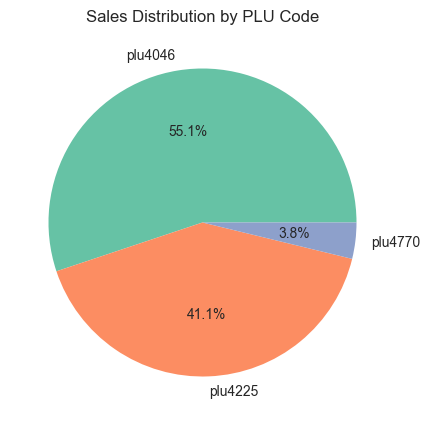

In [11]:
plu_sales = avocado_df[['plu4046', 'plu4225', 'plu4770']].sum()
plu_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Sales Distribution by PLU Code')
plt.ylabel('')
plt.show()

The pie chart displays the sales distribution across different avocado sizes based on PLU (Price Look-Up) codes. The visualization reveals a clear consumer preference hierarchy: small Hass avocados (PLU 4046) are most popular, followed by large Hass avocados (PLU 4225), with medium-sized Hass avocados (PLU 4770) representing the smallest market share. This size preference information provides valuable insight for inventory management and pricing strategies, as it indicates which product sizes might be most sensitive to price changes in terms of consumer demand.

***

### 6. Average Price of Avocados by Month Across Years

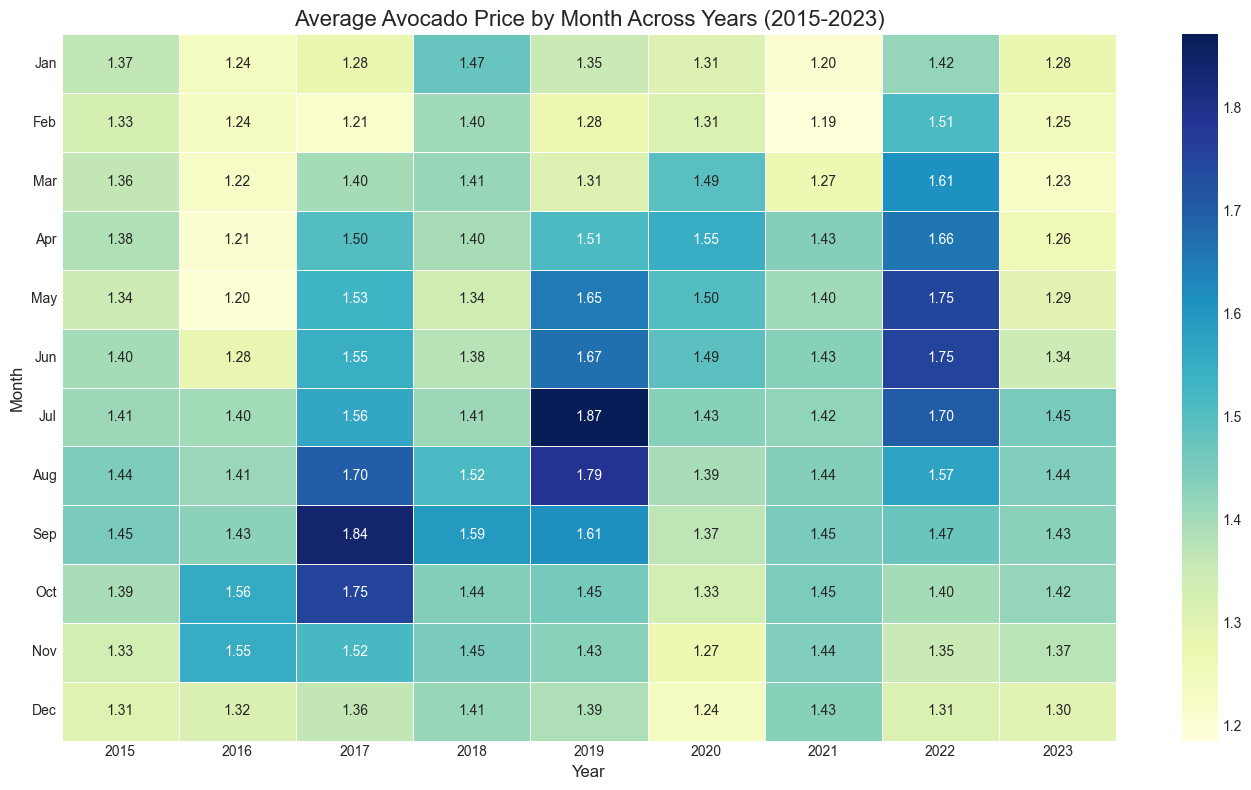

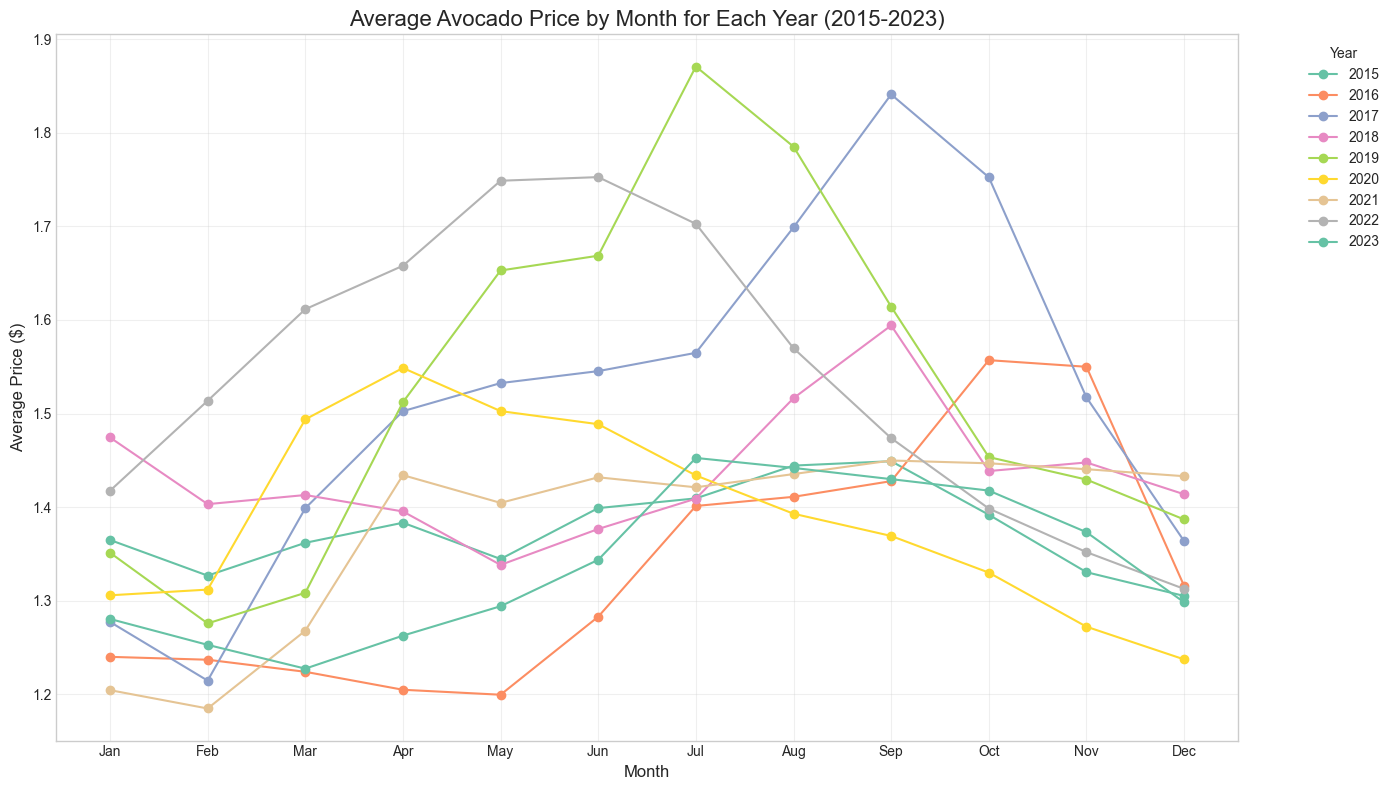

In [12]:
plt.figure(figsize=(14, 8))

# Create month and year columns if they don't exist
if 'month' not in avocado_df.columns:
    avocado_df['month'] = avocado_df['Date'].dt.month
if 'year' not in avocado_df.columns:
    avocado_df['year'] = avocado_df['Date'].dt.year

# Group by month and year to get average price
monthly_yearly_prices = avocado_df.groupby(['year', 'month'])['AveragePrice'].mean().reset_index()

# Create a pivot table for better visualization
price_pivot = monthly_yearly_prices.pivot(index='month', columns='year', values='AveragePrice')

# Plot heatmap
sns.heatmap(price_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Average Avocado Price by Month Across Years (2015-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Set the month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(np.arange(0.5, 12.5), month_labels, rotation=0)

plt.tight_layout()
plt.show()

# Alternative: Line plot showing monthly trends for each year
plt.figure(figsize=(14, 8))
for year in sorted(avocado_df['year'].unique()):
    year_data = monthly_yearly_prices[monthly_yearly_prices['year'] == year]
    plt.plot(year_data['month'], year_data['AveragePrice'], marker='o', label=str(year))

plt.title('Average Avocado Price by Month for Each Year (2015-2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(range(1, 13), month_labels)
plt.grid(True, alpha=0.3)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The heatmap and line plot reveal clear seasonal patterns in avocado pricing across years (2015-2023). Prices typically begin rising in July, peak during summer months (July-September), and then decline through December. This pattern likely reflects the intersection of higher summer demand for gatherings and lower domestic production during these months. Conversely, prices consistently reach their lowest points in winter and early spring (January-March), coinciding with abundant imports from Mexico. 

The visualizations also highlight year-specific anomalies, particularly the unique price pattern in 2020 that diverges from typical seasonality, likely reflecting COVID-19's impact on supply chains and consumption patterns. These consistent seasonal cycles, along with identifiable disruptions during external events, provide strong temporal features for our forecasting models.

***

### 7. Corelation analysis
Correlation analysis helps identify relationships between variables that influence avocado prices. By measuring how strongly features like volume, region, season, and weather correlate with price, we can:

1. Discover key price drivers (e.g., whether total volume strongly affects price)
2. Identify redundant features to avoid multicollinearity in our models
3. Quantify the strength of relationships we observed visually in earlier plots
4. Inform feature selection for our predictive models by prioritizing variables with stronger price relationships

Understanding these correlations will help build more accurate forecasting models by focusing on the most influential factors affecting avocado prices.


 Plotting correlation heatmap...


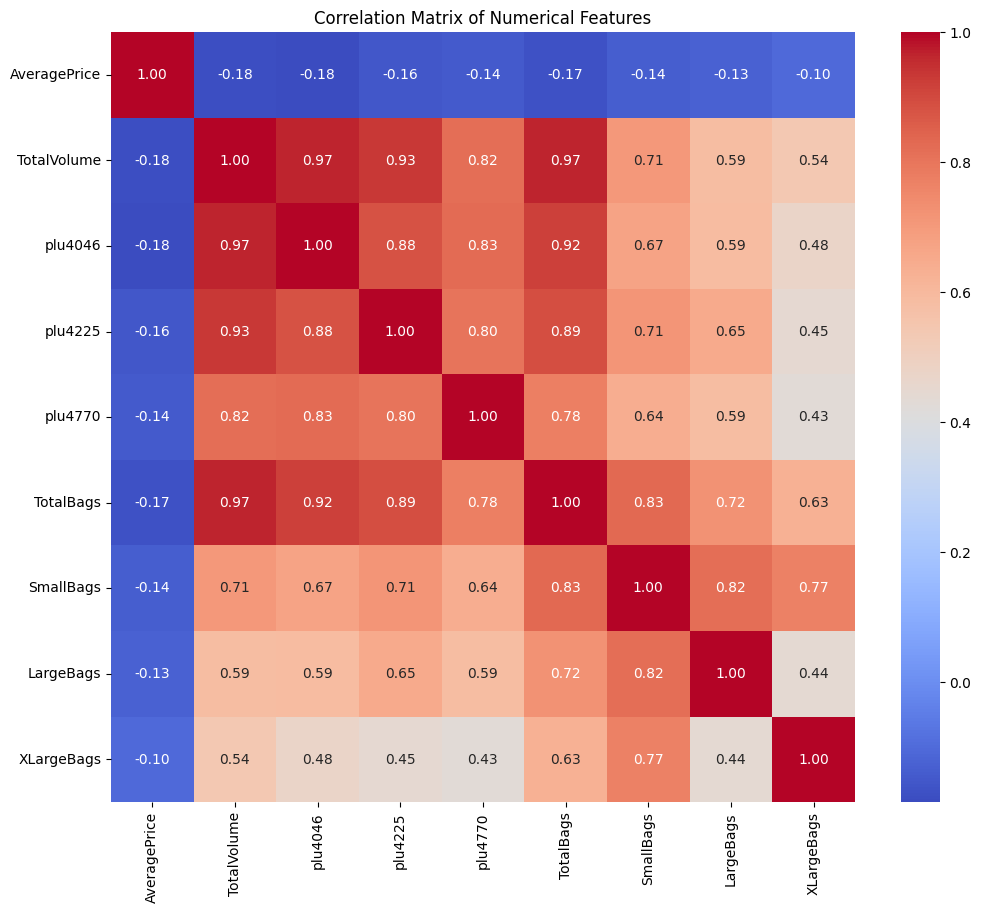


 Explore Data (Visualization) Complete.


In [5]:
print("\n Plotting correlation heatmap...")
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_for_corr = numerical_cols 

correlation_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n Explore Data (Visualization) Complete.")

visualization showing how strongly numerical variables in the avocado dataset relate to each other. It calculates correlation coefficients between all pairs of numeric features and displays them in a color-coded heatmap with exact values. This helps identify which factors most influence avocado prices and which variables might be redundant in our modeling.